In [1]:
import pandas as pd

In [2]:
social_media=pd.read_csv("C:/Users/user/Desktop/Social_media_data_cleaned.csv")

In [3]:
social_media.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Year', 'Residence', 'WhatsApp',
       'Facebook', 'Instagram', 'TikTok', 'Twitter', 'hours_per_day',
       'Academic', 'Entertainment', 'Social', 'News', 'Checking_accounts',
       'Mood', 'Rating_usage', 'Time', 'Upset_of_something',
       'Unable_to_control', 'Stressed', 'Handling_problems', 'Going_right',
       'Not_coping', 'Controlling_irritations', 'On_top', 'Angered',
       'Difficulties_in_overcoming', 'Influences_stress'],
      dtype='object')

In [4]:
social_media["hours_per_day"]=social_media['hours_per_day'].str.replace(" hours","",regex=False)

In [5]:
# Remove leading/trailing spaces and unify dash
social_media['hours_per_day_clean'] = social_media['hours_per_day'].str.strip().str.replace('–', '-', regex=False)


In [6]:
social_media['hours_per_day'].head()


0    4–6
1    7-9
2    4–6
3    1–3
4    4–6
Name: hours_per_day, dtype: object

In [7]:
# Replace en dash with regular hyphen
social_media['hours_per_day_clean'] = social_media['hours_per_day'].str.replace('–', '-', regex=False)


In [8]:
social_media['hours_per_day_clean'].head()

0    4-6
1    7-9
2    4-6
3    1-3
4    4-6
Name: hours_per_day_clean, dtype: object

In [9]:
# Define mapping
range_map = {
    '1-3': 2,   # optional midpoint if you want slightly different
    '4-6': 5,
    '7-9': 8,
    '10+': 10
}

# Map to numeric
social_media['hours_per_day_num'] = social_media['hours_per_day_clean'].map(range_map)

# Check for unmapped values
print(social_media[social_media['hours_per_day_num'].isna()]['hours_per_day_clean'].unique())


['10 or more' 'Less than 1 hour']


In [10]:
social_media['hours_per_day_num'].head()

0    5.0
1    8.0
2    5.0
3    2.0
4    5.0
Name: hours_per_day_num, dtype: float64

In [11]:
pss_items = [
    'Unable_to_control',
    'Stressed',
    'Handling_problems',
    'Going_right',
    'Not_coping',
    'Controlling_irritations',
    'On_top',
    'Angered',
    'Difficulties_in_overcoming',
    'Influences_stress'
]


In [12]:
reverse_items = [
    'Handling_problems',
    'Going_right',
    'On_top',
    'Angered'
]

for item in reverse_items:
    social_media[item + '_R'] = 4 - social_media[item]


In [13]:
pss_final = [
    'Unable_to_control',
    'Stressed',
    'Handling_problems_R',
    'Going_right_R',
    'Not_coping',
    'Controlling_irritations',
    'On_top_R',
    'Angered_R',
    'Difficulties_in_overcoming',
    'Influences_stress'
]


In [14]:
reverse_items = ['Going_right', 'Controlling_irritations', 'On_top', 'Handling_problems']

for col in reverse_items:
    social_media[col + '_rev'] = 4 - social_media[col]


In [15]:
# Convert all relevant columns to numeric, coercing errors to NaN
all_items = ['Unable_to_control', 'Stressed', 'Not_coping', 
             'Angered', 'Difficulties_in_overcoming', 'Influences_stress',
             'Going_right_rev', 'Controlling_irritations_rev', 'On_top_rev', 'Handling_problems_rev']

for col in all_items:
    social_media[col] = pd.to_numeric(social_media[col], errors='coerce')


In [16]:
social_media['PSS10_total'] = social_media[all_items].sum(axis=1)


In [17]:
# See rows with missing or non-numeric values
social_media[social_media[all_items].isnull().any(axis=1)]


,Unnamed: 0,Age,Gender,Year,Residence,WhatsApp,Facebook,Instagram,TikTok,Twitter,...,hours_per_day_num,Handling_problems_R,Going_right_R,On_top_R,Angered_R,Going_right_rev,Controlling_irritations_rev,On_top_rev,Handling_problems_rev,PSS10_total
0,0,19,Female,1st Year,On-campus,0.0,1.0,0.0,0.0,0.0,...,5.0,2.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,19.0
1,1,23,Male,4th Year,Off-campus,1.0,0.0,0.0,1.0,0.0,...,8.0,0.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,17.0
2,2,22,Female,4th Year,On-campus,1.0,0.0,1.0,1.0,0.0,...,5.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,24.0
3,3,23,Male,4th Year,Off-campus,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,15.0
4,4,24,Female,4th Year,Off-campus,1.0,0.0,0.0,0.0,0.0,...,5.0,1.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,20,Female,1st Year,On-campus,1.0,1.0,0.0,1.0,0.0,...,8.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,2.0,18.0
229,229,21,Male,1st Year,On-campus,1.0,0.0,1.0,1.0,1.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
230,230,21,Female,1st Year,On-campus,1.0,0.0,1.0,1.0,1.0,...,NaN,2.0,1.0,0.0,0.0,1.0,2.0,0.0,2.0,23.0
231,231,23,Male,3rd Year,On-campus,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,1.0,3.0,3.0,3.0,2.0,24.0


In [18]:
# Descriptive statistics for all PSS-10 items
descriptive_stats = social_media[all_items].describe().T
print(descriptive_stats)


                             count      mean       std  min  25%  50%  75%  \
Unable_to_control            233.0  2.351931  1.183838  0.0  1.0  2.0  3.0   
Stressed                     233.0  2.665236  1.196057  0.0  2.0  3.0  4.0   
Not_coping                   233.0  2.343348  1.164363  0.0  2.0  2.0  3.0   
Angered                      233.0  2.442060  1.166094  0.0  2.0  2.0  3.0   
Difficulties_in_overcoming   233.0  2.424893  1.197943  0.0  2.0  2.0  3.0   
Influences_stress              0.0       NaN       NaN  NaN  NaN  NaN  NaN   
Going_right_rev              233.0  1.729614  1.117968  0.0  1.0  2.0  2.0   
Controlling_irritations_rev  233.0  1.583691  1.153365  0.0  1.0  2.0  2.0   
On_top_rev                   233.0  1.785408  1.212845  0.0  1.0  2.0  3.0   
Handling_problems_rev        233.0  1.339056  1.171160  0.0  0.0  1.0  2.0   

                             max  
Unable_to_control            4.0  
Stressed                     4.0  
Not_coping                   4.0  
A

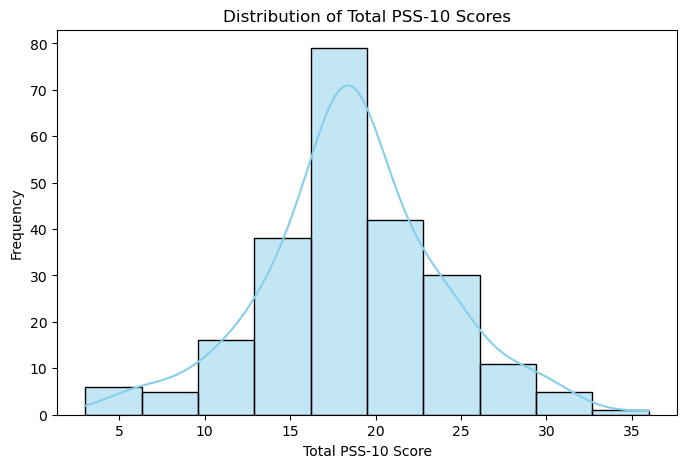

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(social_media['PSS10_total'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total PSS-10 Scores')
plt.xlabel('Total PSS-10 Score')
plt.ylabel('Frequency')
plt.show()


In [1]:
# Function to categorize stress
def categorize_stress(score):
    if score <= 13:
        return 'Low'
    elif score <= 26:
        return 'Moderate'
    else:
        return 'High'

# Apply to total PSS-10 score
social_media['Stress_Level'] = social_media['PSS10_total'].apply(categorize_stress)


NameError: name 'social_media' is not defined

In [21]:
# Count participants in each stress category
stress_freq = social_media['Stress_Level'].value_counts().sort_index()
print(stress_freq)


Stress_Level
High         17
Low          31
Moderate    185
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13268\2979649100.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=social_media, x='Stress_Level', order=['Low','Moderate','High'], palette='Set2')


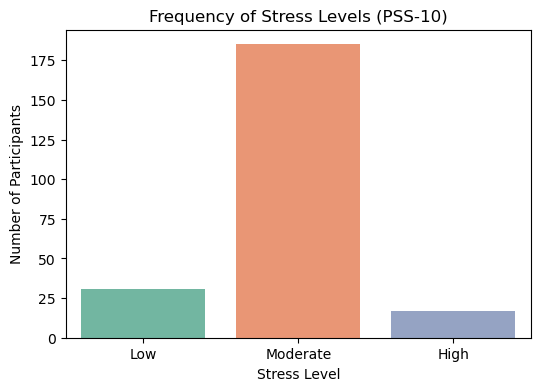

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=social_media, x='Stress_Level', order=['Low','Moderate','High'], palette='Set2')
plt.title('Frequency of Stress Levels (PSS-10)')
plt.xlabel('Stress Level')
plt.ylabel('Number of Participants')
plt.show()


In [23]:
# Cross-tabulation
stress_sex = pd.crosstab(social_media['Gender'], social_media['Stress_Level'], margins=True)
print(stress_sex)


Stress_Level  High  Low  Moderate  All
Gender                                
Female           9    8        66   83
Male             8   23       119  150
All             17   31       185  233


In [24]:
stress_year = pd.crosstab(social_media['Year'], social_media['Stress_Level'], margins=True)
print(stress_year)


Stress_Level  High  Low  Moderate  All
Year                                  
1st Year         6   10        47   63
2nd Year         4    6        45   55
3rd Year         5    9        43   57
4th Year         2    6        50   58
All             17   31       185  233


In [25]:
stress_residence = pd.crosstab(social_media['Residence'], social_media['Stress_Level'], margins=True)
print(stress_residence)


Stress_Level  High  Low  Moderate  All
Residence                             
Off-campus      13   23        98  134
On-campus        4    8        87   99
All             17   31       185  233


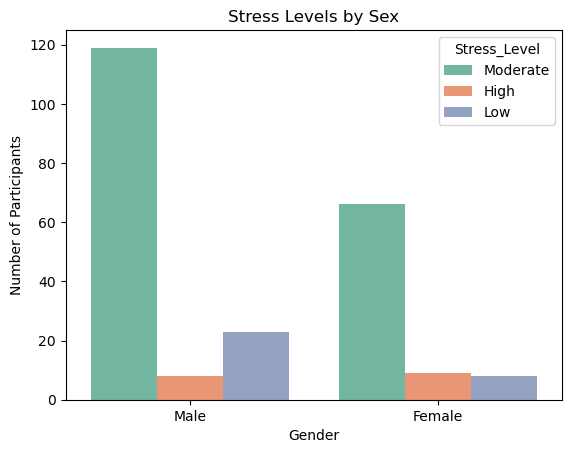

In [26]:
sns.countplot(data=social_media, x='Gender', hue='Stress_Level', order=['Male','Female'], palette='Set2')
plt.title('Stress Levels by Sex')
plt.ylabel('Number of Participants')
plt.show()


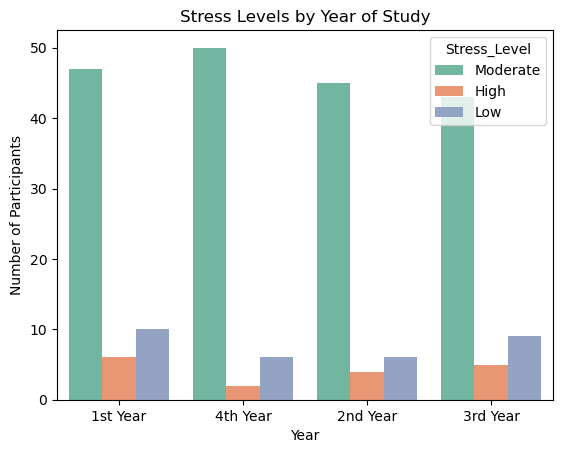

In [27]:
sns.countplot(data=social_media, x='Year', hue='Stress_Level', palette='Set2')
plt.title('Stress Levels by Year of Study')
plt.ylabel('Number of Participants')
plt.show()


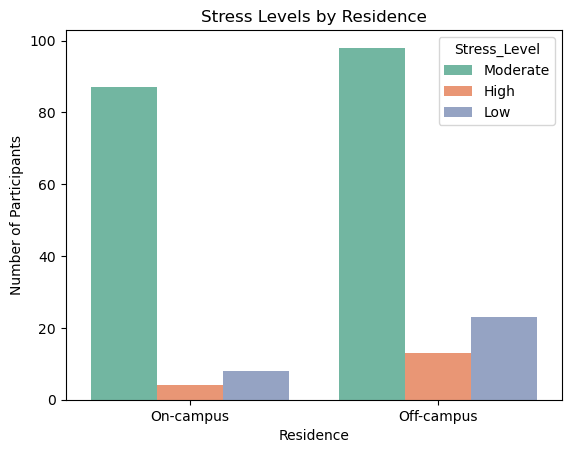

In [28]:
sns.countplot(data=social_media, x='Residence', hue='Stress_Level', palette='Set2')
plt.title('Stress Levels by Residence')
plt.ylabel('Number of Participants')
plt.show()


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [31]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(social_media['hours_per_day_num'], social_media['PSS10_total'])
print(f"Pearson r: {r_value:.3f}, p-value: {p_value:.3f}")


Pearson r: nan, p-value: nan


In [33]:
df_corr = social_media[['hours_per_day', 'PSS10_total']].dropna()


In [35]:
social_media.isnull().sum()

Unnamed: 0                       0
Age                              0
Gender                           0
Year                             0
Residence                        0
WhatsApp                         0
Facebook                         0
Instagram                        0
TikTok                           0
Twitter                          0
hours_per_day                  233
Academic                         0
Entertainment                    0
Social                           0
News                             0
Checking_accounts                0
Mood                             0
Rating_usage                     0
Time                             0
Upset_of_something               0
Unable_to_control                0
Stressed                         0
Handling_problems                0
Going_right                      0
Not_coping                       0
Controlling_irritations          0
On_top                           0
Angered                          0
Difficulties_in_over

In [ ]:
so